In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pylab as plt

from modules.spectral_pool import spectral_pool, max_pool, l2_loss_images
from modules.create_images import open_image, downscale_image
from modules.utils import load_cifar10

% matplotlib inline
% load_ext autoreload
% autoreload 2

In [2]:
images, _ = load_cifar10(1, get_test_data=False)

file already downloaded..
getting batch 1


In [3]:
images.shape

(10000, 32, 32, 3)

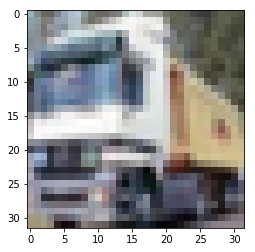

In [4]:
plt.imshow(images[1], cmap='gray')

### max pool test

In [5]:
images_pool = max_pool(images, 2)
images_pool.shape

(10000, 32, 32, 3)

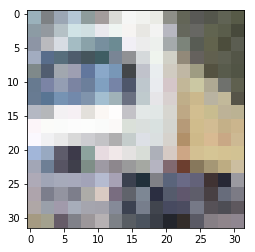

In [6]:
plt.imshow(images_pool[1], cmap='gray')

### spectral pool test

In [7]:
images.shape

(10000, 32, 32, 3)

In [8]:
images = np.moveaxis(images, -1, 1)

images input (1, 3, 32, 32)
all_together output (1, 3, 21, 21)
im_transformed (1, 3, 21, 21)
im_ifft (1, 3, 21, 21)
im_out (1, 21, 21, 3)


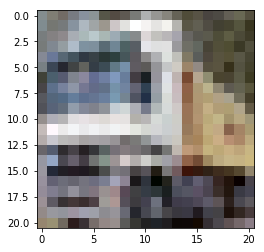

In [13]:
images_sp = spectral_pool(images[1:2], 21)[0]
plt.imshow(images_sp[0], cmap='gray')

In [ ]:
images_sp = spectral_pool(images[:10], 17)[0]
plt.imshow(images_sp[1], cmap='gray')

## Iterate and plot

In [ ]:
# calculate losses for max_pool:
pool_size_mp = [2, 4, 8, 16, 32]
max_pool_errors = []
for s in pool_size_mp:
    images_pool = max_pool(images, s)
    loss = l2_loss_images(images, images_pool)
    max_pool_errors.append(loss)

In [ ]:
# calculate losses for spectral_pool:
# takes a long time to run, could be optimized but not high priority
filter_size_sp = np.arange(1, 32, 2)
spec_pool_errors = []
for s in filter_size_sp:
    images_sp = spectral_pool(images, s)[0]
    loss = l2_loss_images(images, images_sp)
    spec_pool_errors.append(loss)

In [ ]:
pool_frac_kept = [1/x**2 for x in pool_size_mp]
sp_frac_kept = [(x/32.)**2 for x in filter_size_sp]

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.semilogy(pool_frac_kept, max_pool_errors, basey=2,
            marker='o', linestyle='--', color='r', label='Max Pooling')
ax.semilogy(sp_frac_kept, spec_pool_errors, basey=2,
            marker='o', linestyle='--', color='b', label='Spectral Pooling')
ax.legend()
ax.grid(linestyle='--', alpha=0.5)
ax.set_xlabel('Fraction of Parameters Kept')
ax.set_ylabel('Relative Loss')